# Birds Image Classification with InceptionV3

This notebook consists of the following topics:
* About InceptionV3
* About Dataset
* Import Libraries
* Loading Data
* Visualization 
* Data Processing
* Data Augmentation
* InceptionV3 Model
* Compiling the Model
* Fitting
* Evaluating the Model

## About InceptionV3

InceptionV3 is a convolutional neural network for assisting in image analysis and object detection, and got its start as a module for Googlenet. It is the third edition of Google's Inception Convolutional Neural Network, originally introduced during the ImageNet Recognition Challenge. Just as ImageNet can be thought of as a database of classified visual objects, Inception helps classification of objects in the world of computer vision.

![](http://paperswithcode.com/media/methods/inceptionv3onc--oview_vjAbOfw.png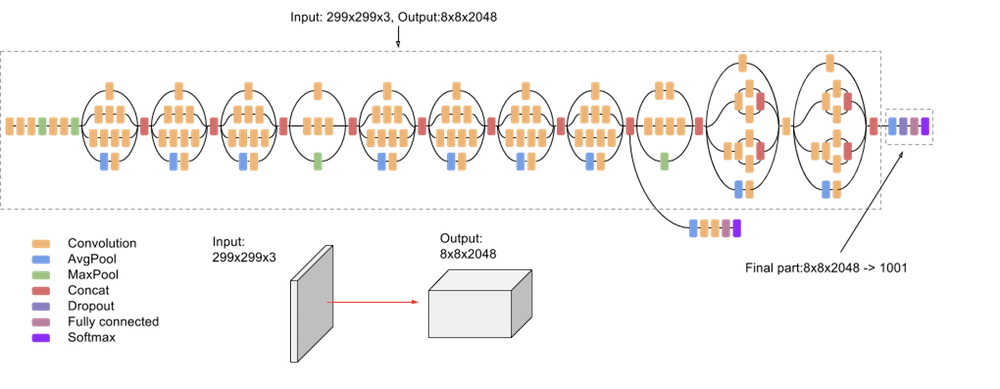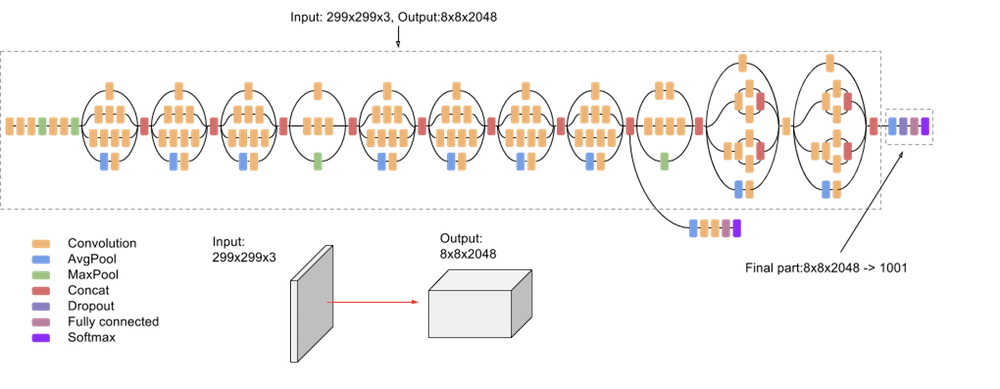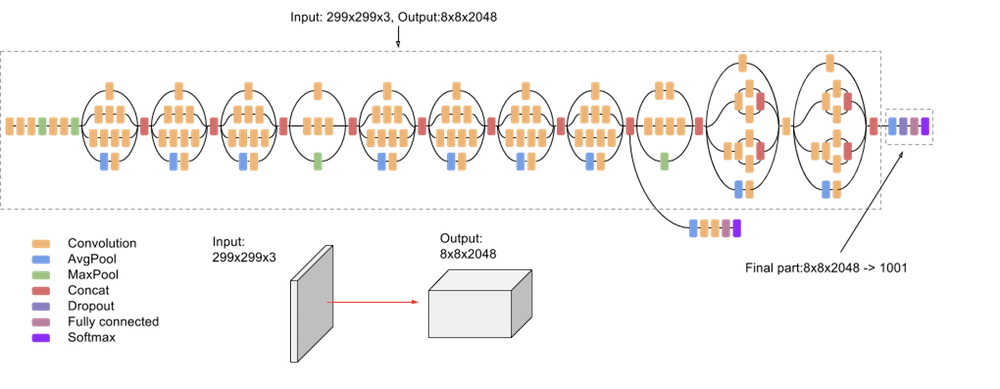)

## About Dataset

The data set consists of 40930 training images, 1425 test images, 1425 validation images and 125 different classes. Images are in 224x224x3 format.

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.layers import Dense, Flatten, BatchNormalization, Dropout
from keras.applications import InceptionV3
from glob import glob

## Loading Data

In [ ]:
train_path = "../input/100-bird-species/285 birds/train"
test_path = "../input/100-bird-species/285 birds/test"
validation_path = "../input/100-bird-species/285 birds/valid"

## Vısualization

In [ ]:
img = load_img(train_path + "/ANHINGA/001.jpg")
plt.imshow(img)
plt.axis("off")
plt.title("Sample Anhinga Image")
plt.show()

plt.figure()

img = load_img(train_path + "/BALD EAGLE/018.jpg")
plt.imshow(img)
plt.axis("off")
plt.title("Sample Bald Eagle Image")
plt.show()

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0,0].imshow(load_img(train_path + "/BARN OWL/018.jpg"))
axs[0,0].axis("off")

axs[0,1].imshow(load_img(train_path + "/ALBATROSS/001.jpg"))
axs[0,1].axis("off")

axs[1,0].imshow(load_img(train_path + "/CANARY/107.jpg"))                        
axs[1,0].axis("off")

axs[1,1].imshow(load_img(train_path + "/CROW/100.jpg"))
axs[1,1].axis("off")

plt.show()

## Data Processing

In [ ]:
className = glob(train_path + "/*")
NumberofClass = len(className)
print("NumberofClass:", NumberofClass)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

## Data Augmentation

In [ ]:
batch_size = 256
train_datagen = ImageDataGenerator(rescale=1/255,
                  shear_range=0.3,
                  horizontal_flip=True,
                  zoom_range=0.3
                  )
val_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
                train_path,
                target_size=(224,224),
                batch_size=batch_size,
                color_mode="rgb",
                class_mode="categorical"
                )

val_generator = val_datagen.flow_from_directory(
                validation_path,
                target_size=(224,224),
                batch_size=batch_size,
                color_mode="rgb",
                class_mode="categorical"
                )

## InceptionV3 Model

In [ ]:
IncV3 = InceptionV3(include_top = False, weights = "imagenet",input_shape = (224,224,3))

In [ ]:
model = Sequential()

model.add(IncV3)
    
for layer in model.layers:
    layer.trainable = False


model.add(Flatten())

model.add(Dense(units = 2048, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = NumberofClass, activation = "softmax"))


## Compiling the Model

In [ ]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

## Fitting

In [ ]:
history = model.fit(train_generator,
                    validation_data = val_generator,
                    epochs = 5,
                    batch_size = batch_size)
                    

## Evaluating the Model

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'], color='b', label="Training loss")
plt.plot(history.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend()
plt.show()